In [14]:
import pandas as pd

In [15]:
import numpy as np

In [16]:
import os

In [17]:
df=pd.read_csv('titanic (3).csv')

In [18]:
df1=df.copy()

In [19]:
df1

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [20]:
df1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [21]:
df1.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [22]:
df1=df1.drop('Cabin',axis=1)

In [23]:
df1.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [24]:
df1.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Embarked'],axis=1,inplace=True)

In [25]:
df1

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
886,2,male,27.0,0
887,1,female,19.0,1
888,3,female,NaN,0
889,1,male,26.0,1


In [29]:
df1=df1.interpolate()

In [30]:
df1

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
886,2,male,27.0,0
887,1,female,19.0,1
888,3,female,22.5,0
889,1,male,26.0,1


In [31]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [33]:
sex=label.fit_transform(df1['Sex'])

In [34]:
df1['Sex']=sex

In [35]:
df1

,Pclass,Sex,Age,Survived
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,1
3,1,0,35.0,1
4,3,1,35.0,0
...,...,...,...,...
886,2,1,27.0,0
887,1,0,19.0,1
888,3,0,22.5,0
889,1,1,26.0,1


In [37]:
x=df1.drop(['Survived'],axis=1)

In [39]:
y=df1['Survived']

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model=RandomForestClassifier(n_estimators=100)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.8,random_state=1)

In [46]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [47]:
model.score(xtest,ytest)

0.7597765363128491

In [54]:
a=model.predict([[3,1,22]])

C:\Users\aftha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
a

array([0], dtype=int64)

In [56]:
y_act=ytest
y_pred=model.predict(xtest)
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_act,y_pred)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

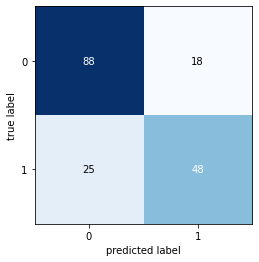

In [57]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)